In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

Reading the csv files

In [61]:
df = pd.read_csv('data/houses.txt',header=None,names = ['size(sqft)','bedrooms','floors','age','Price (1000s dollars)'])
df

,size(sqft),bedrooms,floors,age,Price (1000s dollars)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


Extracting the training datas 

In [62]:
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']
X_train = np.array(df[X_features])  #here we are converting the each training examples into numpy array
X_train
Y_train = np.array(df['Price (1000s dollars)'])


Shape of the training examples, where m denotes the number of training examples and n denotes the number of input features

In [63]:
m,n=X_train.shape
m,n

(100, 4)

Plotting the relation between input features and the price of the house

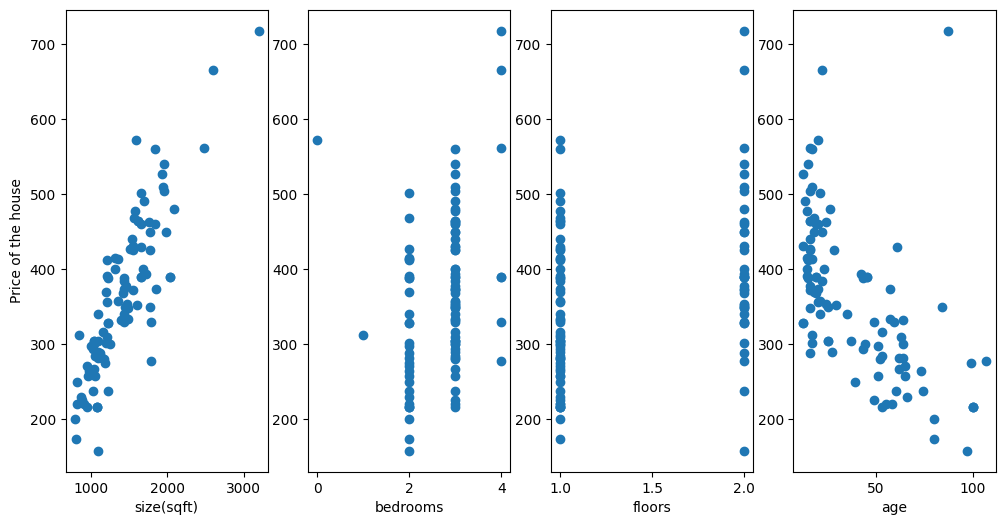

In [64]:
fig,ax = plt.subplots(1,4,figsize=(12,6))
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],Y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('Price of the house')
plt.show()

Initial values of weight and bias price

In [65]:
w_init = np.zeros(n)
b_init = 0


Function to compute cost function

In [66]:
def cost_function(x,y,w,b,m):
    sqaured_error = 0
    for i in range(m):
        y_pred = np.dot(w,x[i]) + b
        error = y_pred - y[i]
        sqaured_error+=np.square(error)
    return  sqaured_error/(2*m)   
cost_function(X_train,Y_train,w_init,b_init,m)    

np.float64(71024.09206744)

Function to compute the partial derivative

In [67]:
def compute_derivative(x,y,w,b,m,n):
    dj_db = 0
    dj_dw = np.zeros(n)  #the number of the partial derivatives must be equal to the number of weights as each weight must have their own partial derivative
    for i in range(m):
        y_pred = np.dot(w,x[i]) + b
        error =y_pred - y[i] 
        for j in range(n):
            dj_dw[j]+=error * x[i,j]
        dj_db+=error
    return dj_dw/m,dj_db/m 
compute_derivative(X_train,Y_train,w_init,b_init,m,n)    
        
    

(array([-5.48850468e+05, -1.00137228e+03, -5.16041620e+02, -1.24551926e+04]),
 np.float64(-362.23951999999997))

TRAINING OUR MODEL

In [68]:
def gradient_descent(x,y,w_init,b_init,gradient,cost_function,alpha,iterations):
    w= copy.deepcopy(w_init)
    b=b_init
    m,n=x.shape
    loss_error = []
    hist_iterations=[]
    for i in range(iterations):
        dj_dw,dj_db = gradient(x,y,w,b,m,n)
        cost = cost_function(x,y,w,b,m)
        loss_error.append(cost)
        hist_iterations.append(i)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
    return w,b,loss_error,hist_iterations
alpha = 1e-7
iterations = 50
final_w,final_b,loss_history,hist_iterations = gradient_descent(X_train,Y_train,w_init,b_init,compute_derivative,cost_function,alpha,iterations)
final_w    
final_b    

np.float64(0.00018697139921778375)

STUDYING THE LEARNING CURVE

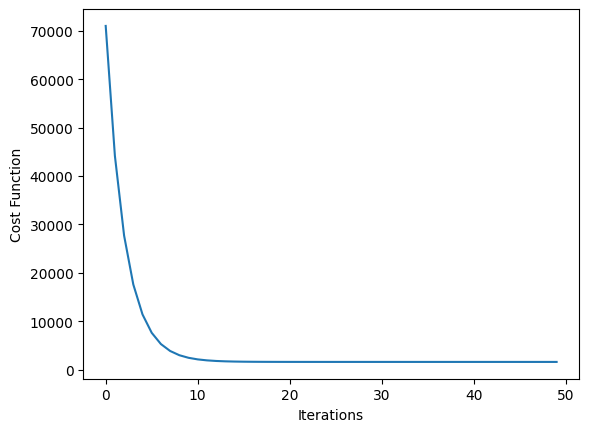

In [69]:
plt.figure()
plt.plot(hist_iterations,loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

In [70]:
np.dot(final_w,X_train[0]) + final_b

np.float64(241.06669412719216)

In [71]:
Y_train[0]

np.float64(271.5)

Feature Scaling

In [95]:
def normalize_data(x):
    mu = np.mean(x,axis = 0)  #column wise calculation of mean
    sigma = np.std(x,axis = 0) #column wise calculation of std
    normalized =  (x-mu) / sigma
    return mu,sigma,normalized
X_mu,X_sigma,X_normalized = normalize_data(X_train)


New value of learning rate,
New value of iterations,
Gradient descent after normalization

In [96]:
alpha = 1.0e-1
iterations = 1000
final_w,final_b,loss_history,hist_iterations = gradient_descent(X_normalized,Y_train,w_init,b_init,compute_derivative,cost_function,alpha,iterations)
final_w    
final_b 

np.float64(362.2395199999998)

In [97]:
m = X_normalized.shape[0]  #number of training examples
Y_predicted = np.zeros(m)
for i in range(m):
    Y_predicted[i] = np.dot(final_w,X_normalized[i]) + final_b
    

Plotting the original house price and the predicted house price done by our model, using the given training examples

Text(0, 0.5, 'Price of house')

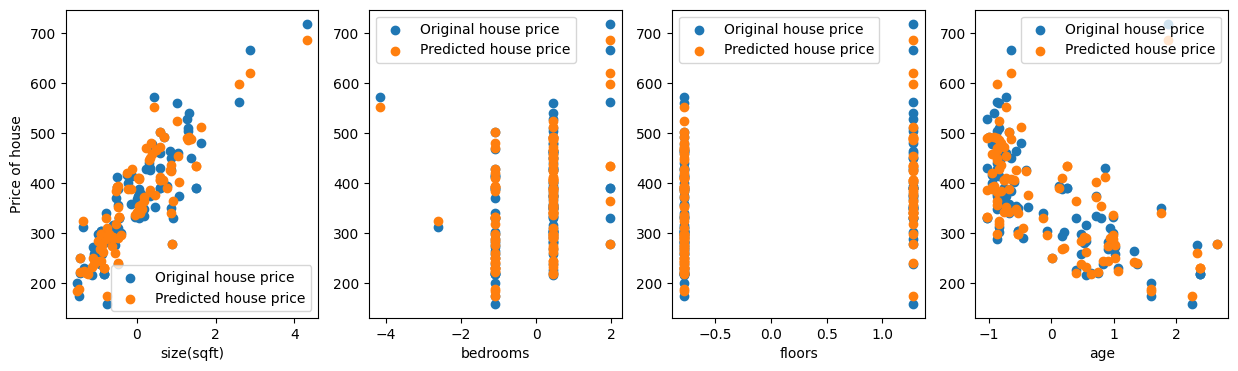

In [101]:
fig,ax = plt.subplots(1,4,figsize=(15,4))
for i in range(len(ax)):
    ax[i].scatter(X_normalized[:,i],Y_train,label='Original house price')  #scatter plot between price and each feature datas
    ax[i].scatter(X_normalized[:,i],Y_predicted,label='Predicted house price')  #scatter plot between predicted price and each feature datas
    ax[i].set_xlabel(X_features[i])
    ax[i].legend()
ax[0].set_ylabel('Price of house')


Predicting the house price with new datasets

In [102]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, final_w) + final_b
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.51849608  0.44436943 -0.78288136  0.05235597]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318936
